<a href="https://colab.research.google.com/github/Sahar-bgi/python/blob/main/imageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Upload the Kaggle API credentials JSON file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balaganesh09","key":"140f31db0eb3f738472a354ca38568a9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog



 99% 215M/218M [00:01<00:00, 229MB/s]
100% 218M/218M [00:01<00:00, 191MB/s]


In [ ]:
! unzip cat-and-dog.zip -d cat-and-dog


Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import matplotlib.pylab as plt
plt.style.use('ggplot')
cat_files =glob('cat-and-dog/training_set/training_set/cats/*.jpg')
dog_files =glob('cat-and-dog/training_set/training_set/dogs/*.jpg')

In [ ]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])
img_mpl.shape, img_cv2.shape

((331, 500, 3), (331, 500, 3))

In [ ]:
img_mpl

array([[[215, 218, 225],
        [215, 218, 225],
        [216, 219, 226],
        ...,
        [145, 144, 142],
        [136, 135, 133],
        [136, 135, 133]],

       [[215, 218, 225],
        [215, 218, 225],
        [216, 219, 226],
        ...,
        [145, 144, 142],
        [137, 136, 134],
        [137, 136, 134]],

       [[216, 219, 226],
        [216, 219, 226],
        [216, 219, 226],
        ...,
        [146, 145, 143],
        [137, 136, 134],
        [137, 136, 134]],

       ...,

       [[207, 208, 213],
        [207, 208, 213],
        [208, 209, 214],
        ...,
        [194, 193, 199],
        [193, 192, 198],
        [192, 191, 197]],

       [[207, 208, 213],
        [207, 208, 213],
        [208, 209, 214],
        ...,
        [194, 193, 199],
        [193, 192, 198],
        [192, 191, 197]],

       [[207, 208, 213],
        [207, 208, 213],
        [208, 209, 214],
        ...,
        [194, 193, 199],
        [193, 192, 198],
        [192, 191, 197]]

In [ ]:
img_mpl.max()



255

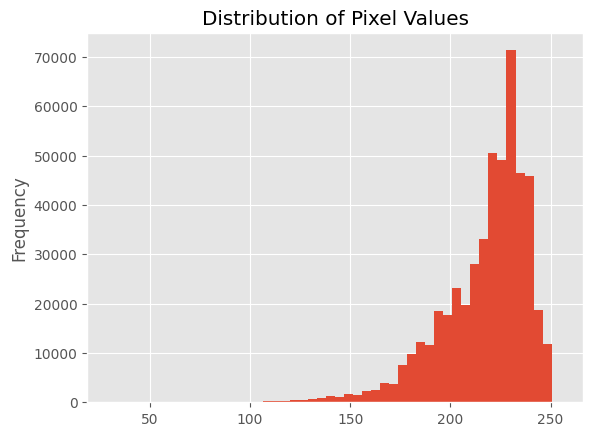

In [ ]:
pd.Series(img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values')
plt.show()

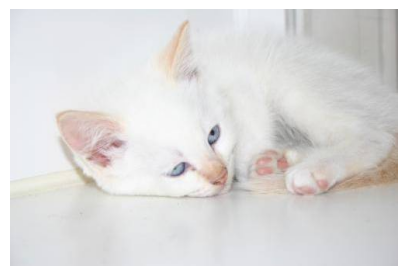

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

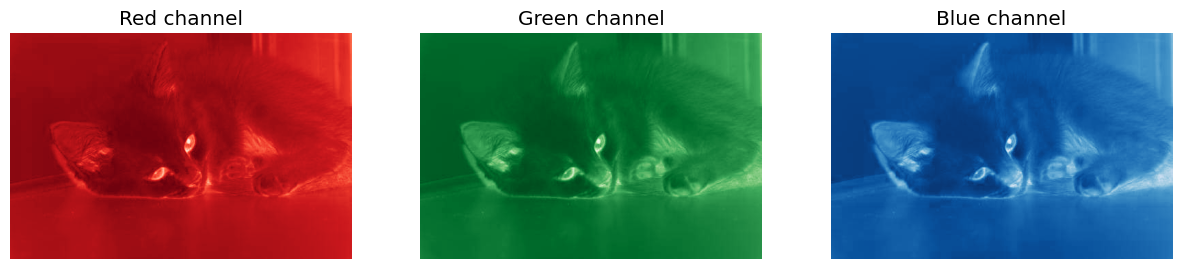

In [ ]:
# Display RGB Channels of our image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

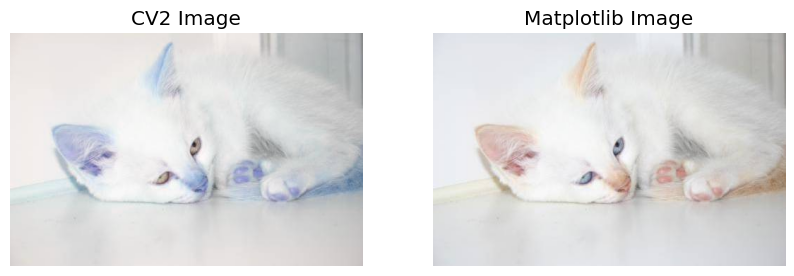

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2 Image')
axs[1].set_title('Matplotlib Image')
plt.show()

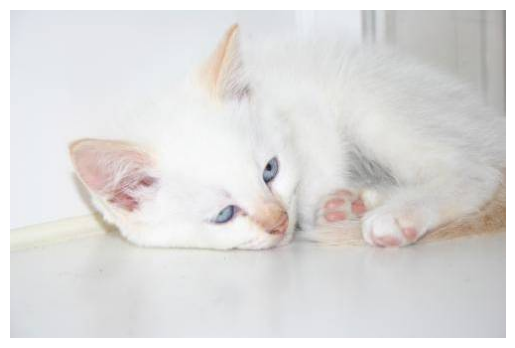

In [ ]:
# Converting from BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

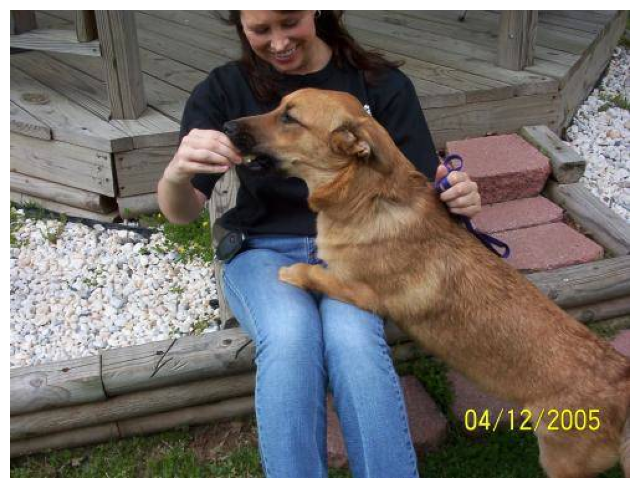

In [ ]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.show()

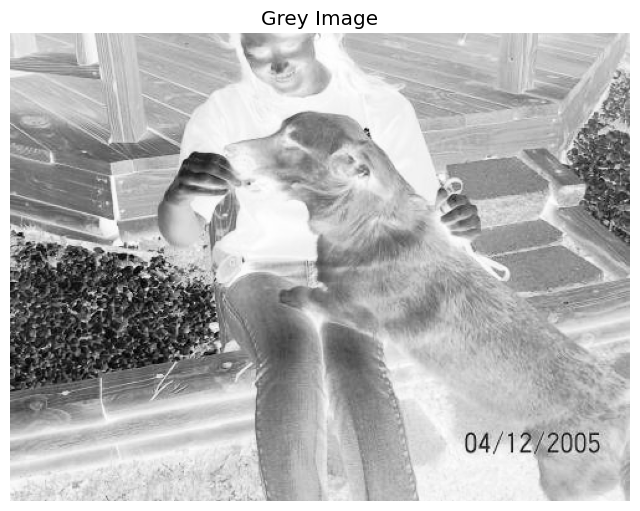

In [ ]:
#Grey image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

In [ ]:
img_gray.shape

(377, 499)

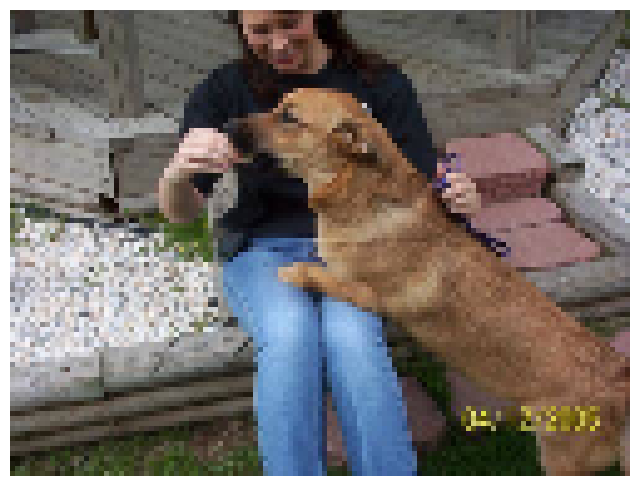

In [ ]:
#Resize and scaling
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

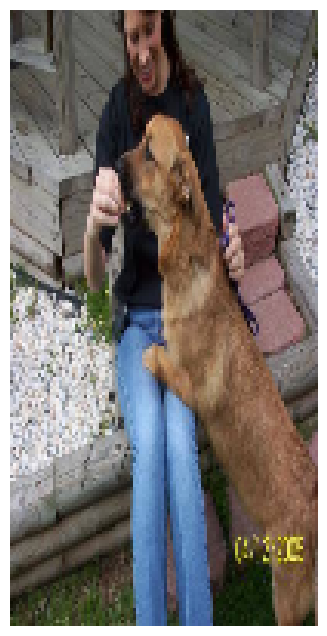

In [ ]:
# Different Size
img_resize = cv2.resize(img, (100, 200))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

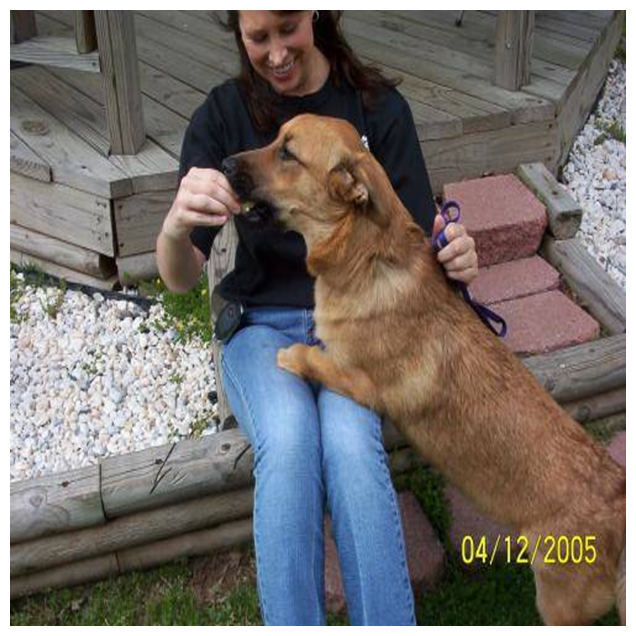

In [ ]:
img_resize = cv2.resize(img, (5000, 5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_resize)
ax.axis('off')
plt.show()

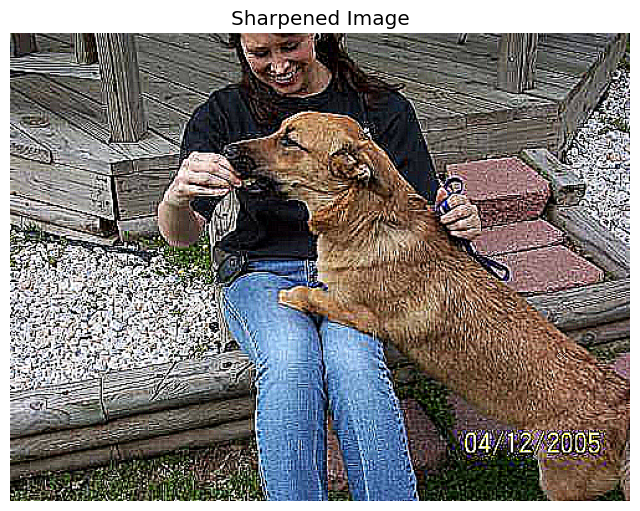

In [ ]:
# Sharpen Image
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

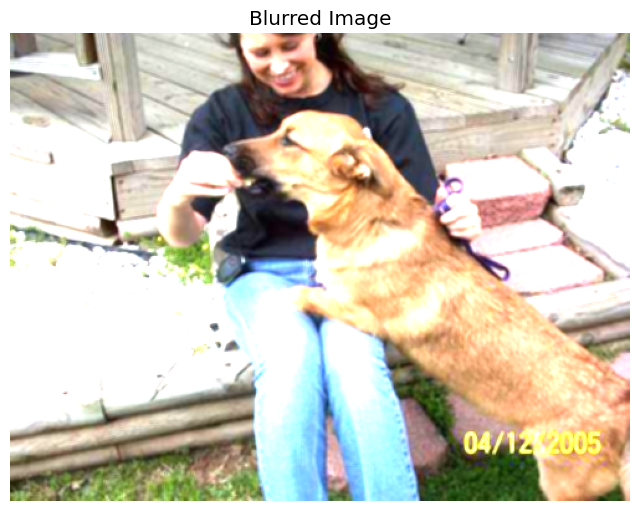

In [ ]:
 #Blurring the image
kernel_3x3 = np.ones((3, 3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

In [ ]:
plt.imsave('mpl_dog.png', blurred)
cv2.imwrite('cv2_dog.png', blurred)

True

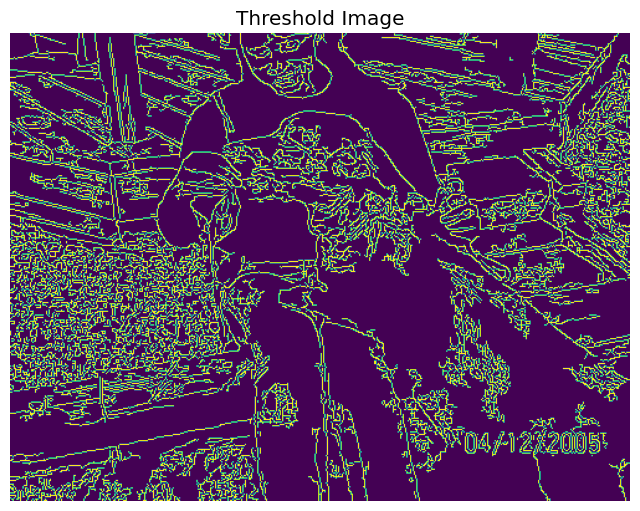

In [ ]:
edges = cv2.Canny(img,threshold1=0,threshold2=255 )
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(edges)
ax.axis('off')
ax.set_title('Threshold Image')
plt.show()

In the code edges = cv2.Canny(img, threshold1=0, threshold2=255), the values threshold1 and threshold2 are used to control the Canny edge detection algorithm's sensitivity to edges in the image. Let's understand their purpose:

threshold1: This parameter sets the lower threshold for edge detection. Any edge with an intensity gradient value below this threshold will be discarded. In your code, threshold1 is set to 0, which means that any gradient value greater than or equal to zero will be considered as an edge.

threshold2: This parameter sets the upper threshold for edge detection. Any edge with an intensity gradient value above this threshold is definitely an edge. In your code, threshold2 is set to 255, which means that any gradient value equal to or greater than 255 is considered a strong edge.

The Canny edge detection algorithm operates in the following way:

Pixels with gradient values above threshold2 are marked as strong edges.
Pixels with gradient values below threshold1 are discarded as non-edges.
Pixels with gradient values between threshold1 and threshold2 are considered weak edges.
Typically, the purpose of setting threshold1 to 0 and threshold2 to 255 is to retain all possible edges in the image. This means that any gradient value, regardless of how weak or strong, will be considered an edge. However, you can adjust these thresholds based on your specific requirements. For example:

If you want to focus only on strong, well-defined edges, you can increase threshold2 and possibly decrease threshold1.

If you want to capture more subtle edges, you can reduce threshold2, but be prepared to handle more noise in the result.

The choice of threshold values depends on the characteristics of your image and the desired trade-off between sensitivity to edges and noise rejection. Experimenting with different threshold values is often necessary to fine-tune edge detection for your particular application.










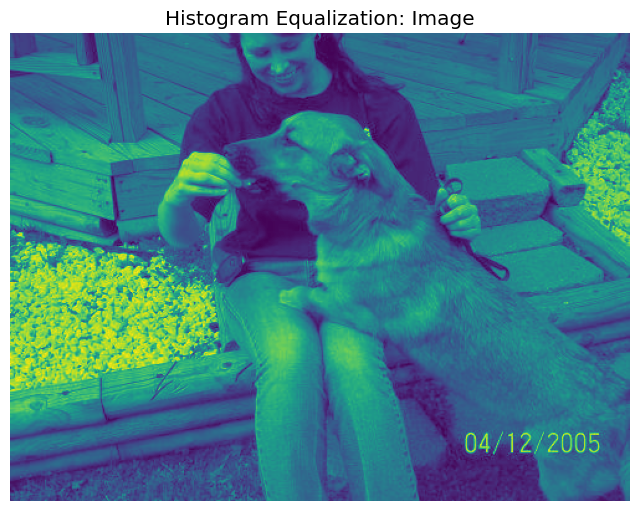

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8, 8))
equalized_image = cv2.equalizeHist(img_gray)
ax.imshow(img_gray)
ax.axis('off')
ax.set_title('Histogram Equalization: Image')
plt.show()